# **Лабораторная работа №10 по вычислительной математикe.**

## Работу выполнил: Шурыгин Антон, Б01 - 909.

### **Решение уравнения переноса**

##### Заданием данной лабораторной работы является разработка программы, осуществляющей поиск численного решения для уравнения переноса:

$$
\begin{equation*}
 \begin{cases}
    \frac{\partial u}{\partial t} + a \cdot \frac{\partial u}{\partial x} = f(t, x) , \:\:\: 0 \leq t \leq T, \:\:\: 0 \leq x \leq X
    \\
    u(x, 0) = \varphi(x), \:\:\: 0 \leq x \leq X
    \\
    u(0, t) = \psi(t), \:\:\: 0 \leq t \leq T
 \end{cases}
\end{equation*}
$$

##### Для решения задачи используется равномерная сетка с шагами τ по времени и h по координате. 

##### Функция $u(t,x)$ рассматривается в точках $t=k\tau$,  $x=mh$,  $0 \leq k \leq K$, $\leq m \leq M$,  $T=K\tau$,  $X=Mh$.


##### Для поиска решения использовать явная центральная трехточечная схема:

##### Разностная схема записывается следующим образом:

$$
\begin{equation*}
   u_{m}^{k+1} - \frac{1}{2\tau}(u_{m + 1}^{k} + u_{m - 1}^{k}) + \frac{1}{2h}(u_{m + 1}^{k} + u_{m - 1}^{k}) = f_{m}^{k}, \:\:\: k = \overline{0, K-1}, \:\: m = \overline{0, M}  
\end{equation*}
$$

Выразим значение $ u_m^{k+1} сеточной функции:$

$$
\begin{equation*}
   u_{m}^{k+1} = u_{m}^{k} - \frac{\tau}{h} \cdot (u_{m}^{k} - u_{m - 1}^{k}) + \tau\cdot f_{m}^{k}, \:\:\: k = \overline{0, K-1}, \:\: m = \overline{0, M}  
\end{equation*}
$$


#####  


In [53]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [54]:
tau = 1e-3
h = 1e-3

T = X = 1

x_steps = int(X / h)
t_steps = int(T / tau)

In [55]:
def phi(x):
    return np.cos(np.pi * x)

def psi(t):
    return np.exp(-t)

def f(x, t):
    return x + t

In [56]:
def solve_eq():
    data = np.zeros((t_steps, x_steps))

    for t in range(data.shape[0]):
        data[t][0] = psi(t * tau)

    for x in range(data.shape[1]):
        data[0][x] = phi(x * h)

    for t in range(1, data.shape[0]):
        for x in range(0, data.shape[1] - 1):
            data[t][x + 1] =  data[t][x] - (tau / h) * (data[t][x] - data[t-1][x]) + tau * f(x * h, t * tau)
            
    return data

def plot(u):
    x = np.arange(start=0, stop=X, step=h)
    t = np.arange(start=0, stop=T, step=tau)

    x, t = np.meshgrid(x, t)

    fig = plt.figure(figsize=(15, 15))
    graph = plt.axes(projection='3d')

    surf = graph.plot_surface(x, t, u, cmap=cm.plasma)
    graph.set_xlabel("x", fontsize=20)
    graph.set_ylabel("t", fontsize=20)

    graph.set_zlabel("u(x, t)", fontsize=20)

    fig.colorbar(surf, shrink=0.5)

    plt.grid()
    plt.show()


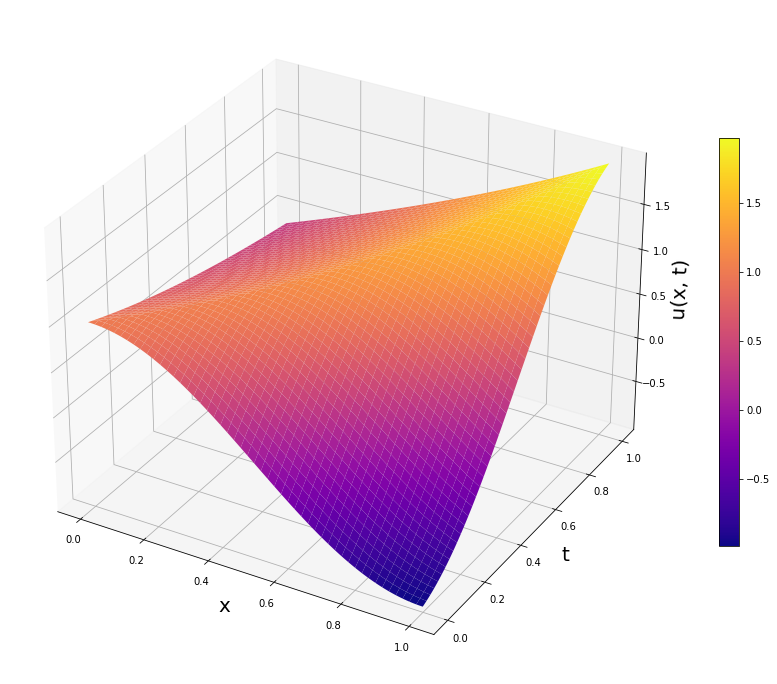

In [57]:
plot(solve_eq())